In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv', low_memory=False)

In [31]:
data.head()

,RowID,StateID,WellName,APINo,County,State,LatDegree,LongDegree,SRS,DrillerTotalDepth,...,T490,T491,T492,T493,T494,T495,T496,T497,T498,T499
0,610,KY604,,16019000020000,Boyd,KY,38.460130,-82.721020,NAD 83,1735,...,167.93,168.21,168.50,168.78,169.06,169.34,169.62,169.90,170.18,170.46
1,611,KY605,,16019000030000,Boyd,KY,38.459500,-82.716841,NAD 83,1738,...,159.30,159.57,159.84,160.10,160.37,160.64,160.90,161.17,161.44,161.70
2,612,KY606,,16019000060000,Boyd,KY,38.454476,-82.712581,NAD 83,2151,...,122.18,122.39,122.59,122.79,123.00,123.20,123.40,123.60,123.81,124.01
3,613,KY607,,16019000090000,Boyd,KY,38.443355,-82.714851,NAD 83,2139,...,113.00,113.19,113.38,113.57,113.75,113.94,114.13,114.31,114.50,114.69
4,614,KY608,,16019000180000,Boyd,KY,38.424684,-82.710950,NAD 83,1893,...,139.71,139.94,140.17,140.41,140.64,140.87,141.11,141.34,141.57,141.81


In [32]:
data.describe()

,RowID,LatDegree,LongDegree,DrillerTotalDepth,TrueVerticalDepth,DepthofMeasurement,MeasuredTemperature,BHT_C,CalcDepth_m,MeasureDepth_m,...,T490,T491,T492,T493,T494,T495,T496,T497,T498,T499
count,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,...,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000
mean,21710.786602,40.241258,-80.044320,3849.955229,2608.111373,3775.635759,91.991560,33.328624,1150.813179,1150.813179,...,109.951828,110.111375,110.271200,110.430832,110.590231,110.749599,110.908977,111.068356,111.227493,111.386533
std,11416.792358,1.889082,1.656995,1646.581771,2261.368299,1510.364606,21.724858,12.069361,460.359541,460.359541,...,55.267669,55.356223,55.444941,55.533636,55.622045,55.709480,55.796514,55.883543,55.970541,56.057851
min,610.000000,36.858834,-83.107439,0.000000,0.000000,79.000000,0.000000,-17.780000,23.960000,23.960000,...,-216.890000,-216.770000,-216.660000,-216.550000,-216.440000,-216.330000,-216.220000,-216.110000,-216.000000,-215.890000
25%,12915.250000,38.483333,-81.292157,2881.250000,0.000000,2825.250000,80.000000,26.670000,861.135000,861.135000,...,93.010000,93.130000,93.262500,93.392500,93.530000,93.652500,93.772500,93.902500,94.022500,94.170000
50%,18498.500000,40.583324,-79.678706,3750.000000,3171.500000,3700.000000,89.000000,31.670000,1127.760000,1127.760000,...,106.070000,106.235000,106.390000,106.550000,106.710000,106.870000,107.040000,107.200000,107.360000,107.520000
75%,34605.000000,42.049665,-79.174846,4620.000000,4301.000000,4451.000000,100.000000,37.780000,1356.660000,1356.660000,...,120.200000,120.377500,120.560000,120.740000,120.930000,121.100000,121.280000,121.457500,121.630000,121.807500
max,41099.000000,43.653020,-74.214870,21460.000000,21460.000000,21460.000000,908.000000,486.670000,6541.010000,6541.010000,...,2976.650000,2981.280000,2985.920000,2990.550000,2995.180000,2999.820000,3004.450000,3009.090000,3013.720000,3018.350000


In [33]:
features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp', 'HeatFlow']
lat = data['LatDegree']
lon = data['LongDegree']
depth = data['MeasureDepth_m']
temp = data['SurfTemp']
heatf = data['HeatFlow']

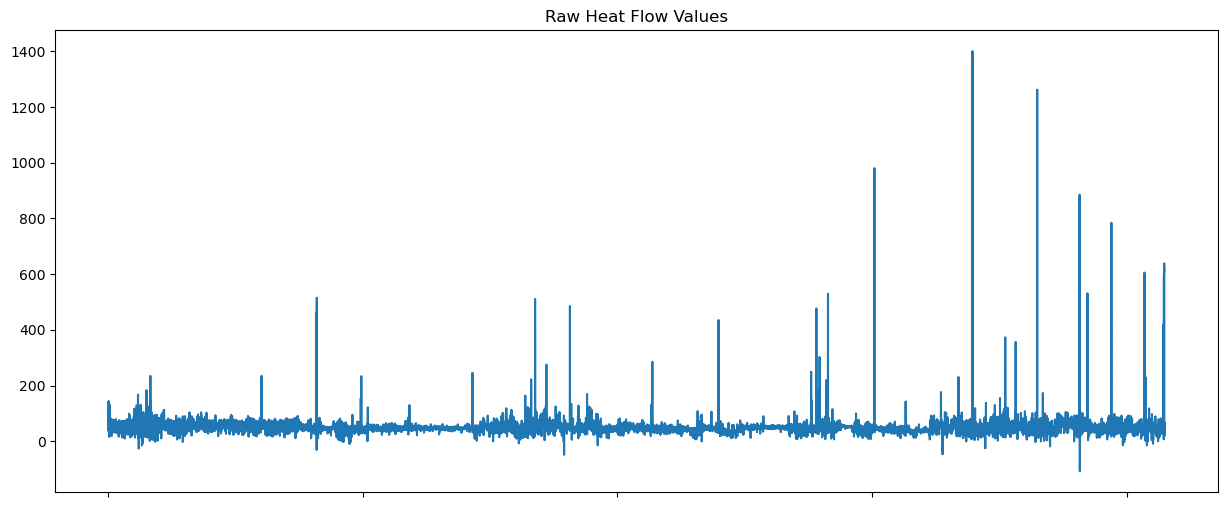

In [34]:
plt.figure(figsize=(15,6))
plt.title('Raw Heat Flow Values')
plt.plot(heatf)
ax = plt.gca()

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)

<Axes: xlabel='HeatFlow', ylabel='Density'>

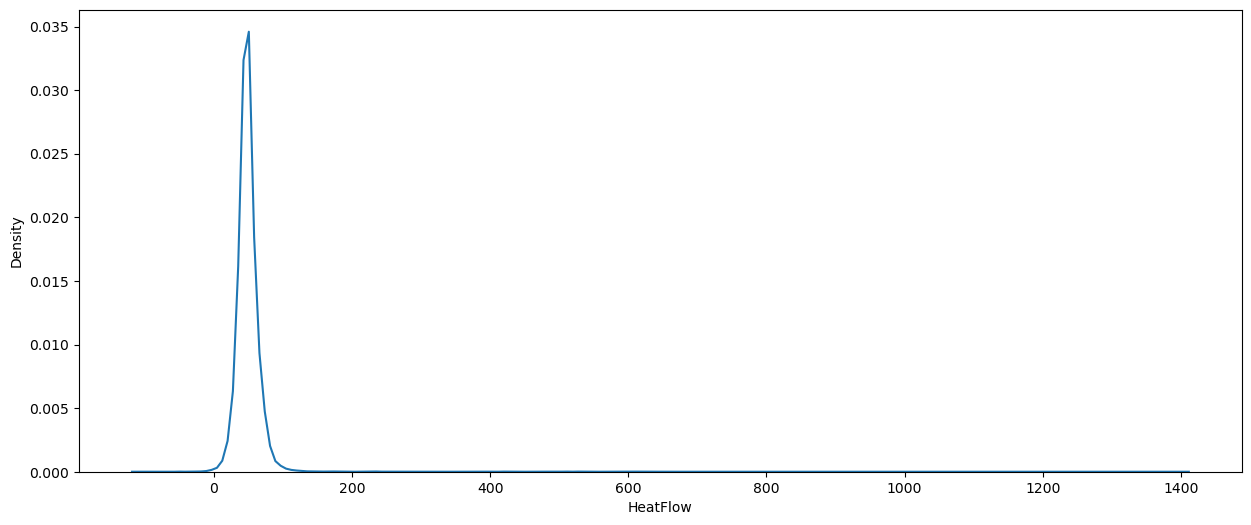

In [35]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.kdeplot(data=heatf)

# IQR outlier removal

In [36]:
def remove_outliers_iqr(data, column):
    # Calculate the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create masks for outliers and non-outliers
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    # Create a mask for non-outliers
    non_outliers_mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    
    # Plot the original column values
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[column], label='Original Data', linewidth=0.5)
    
    # Highlight outliers in red
    plt.scatter(data.index[outliers_mask], data[column][outliers_mask], color='red', label='Outliers', zorder=10)
    
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.title(f'Original Data with Outliers Highlighted in Red ({column})')
    plt.show()
    
    return data[non_outliers_mask].copy()

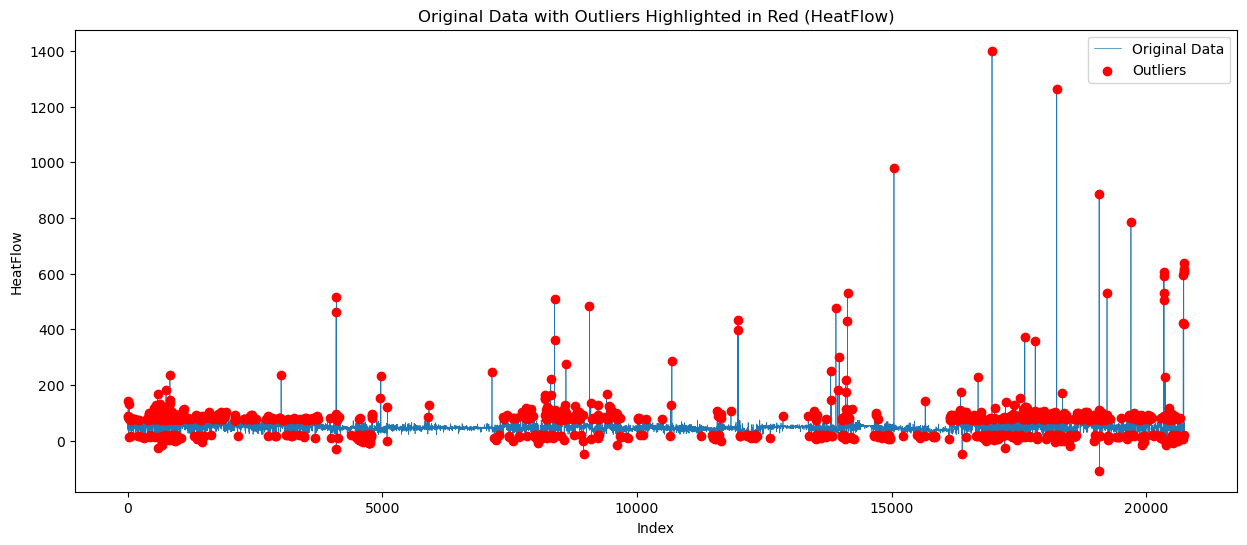

In [37]:
filtered_data = remove_outliers_iqr(data, 'HeatFlow')

In [38]:
filtered_data = filtered_data.reset_index(drop=True)

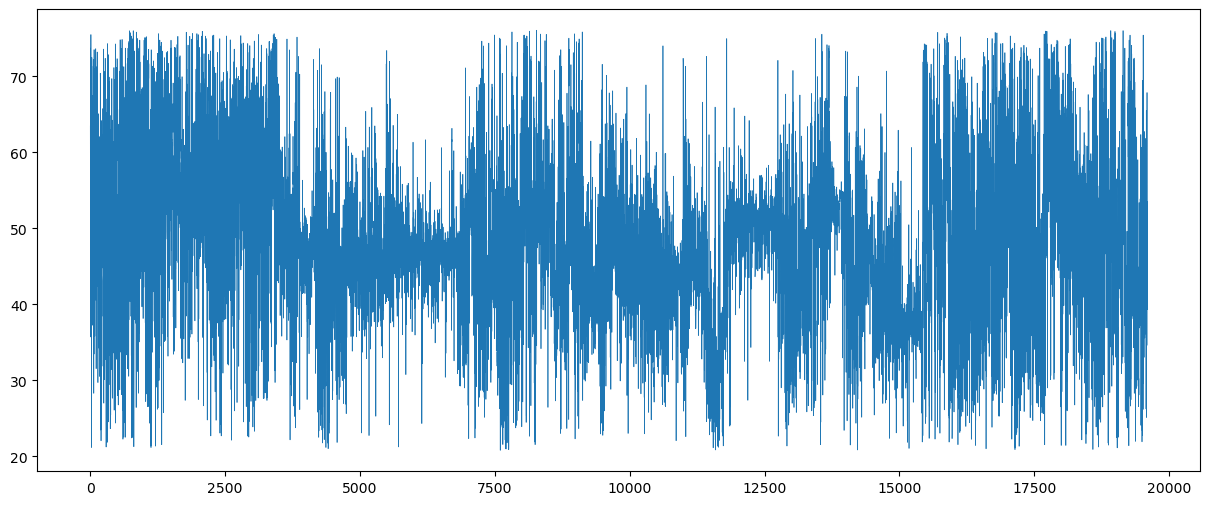

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(filtered_data.HeatFlow)), filtered_data.HeatFlow, linewidth=0.5)

# HP TUNING WITH IQR OUTLIER REMOVAL AND LIGHTGBM

In [50]:
from sklearn.preprocessing import MinMaxScaler


# Identify numeric columns (excluding string columns)
numeric_columns = filtered_data.select_dtypes(include=['number']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on numeric columns and transform them
filtered_data[numeric_columns] = scaler.fit_transform(filtered_data[numeric_columns])

In [51]:
# Define features and target
features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp']
geological_layers = filtered_data.iloc[:, 52:101].values
geological_conds = filtered_data.iloc[:, 101:150].values
mult = np.multiply(geological_layers, geological_conds)
np.nan_to_num(mult, 0)
X = np.concatenate((filtered_data[features].values, mult), axis=1)
y = filtered_data['CorrBHT'].values

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Assuming X, y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# # Assuming X, y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Define the hyperparameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': [10, 20, 30],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15],
#     'min_child_samples': [5, 10, 20]
# }

# # Initialize a list to store dictionaries with hyperparameters and error values
# error_list = []

# # Iterate through all combinations
# for lr in param_grid['learning_rate']:
#     for num_leaves in param_grid['num_leaves']:
#         for n_estimators in param_grid['n_estimators']:
#             for max_depth in param_grid['max_depth']:
#                 for min_child_samples in param_grid['min_child_samples']:
#                     # Create a LightGBM model with the current hyperparameters
#                     model = lgb.LGBMRegressor(
#                         learning_rate=lr,
#                         num_leaves=num_leaves,
#                         n_estimators=n_estimators,
#                         max_depth=max_depth,
#                         min_child_samples=min_child_samples
#                     )

                    # Fit the model on the training data
#                     model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

#                     # Make predictions on the validation data
#                     y_pred_val = model.predict(X_val)

#                     # Calculate the mean squared error on the validation set
#                     error = mean_squared_error(y_val, y_pred_val)

#                     # Store hyperparameters and error in a dictionary
#                     error_dict = {
#                         'learning_rate': lr,
#                         'num_leaves': num_leaves,
#                         'n_estimators': n_estimators,
#                         'max_depth': max_depth,
#                         'min_child_samples': min_child_samples,
#                         'error': error
#                     }

#                     # Append the dictionary to the list
#                     error_list.append(error_dict)
                    
#                     print('------------------------------------------------------------>', error)

# # Convert the list of dictionaries to a DataFrame
# error_df = pd.DataFrame(error_list)

# # Display the DataFrame
# print(error_df)

In [118]:
error_df.to_excel('HP-turning-grid-search-lightgbm-IQR.xlsx')

In [63]:
import lightgbm as lgb

model = lgb.LGBMRegressor(learning_rate=0.1, num_leaves=30, n_estimators=200, max_depth=15, min_child_samples=5)
model.fit(X_train, y_train)
# Make predictions on the validation data
y_pred_test = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13041
[LightGBM] [Info] Number of data points in the train set: 15674, number of used features: 52
[LightGBM] [Info] Start training from score 0.194656


In [86]:
y_test_inverse = y_test.reshape(-1, 1)
y_test_inverse = scaler.inverse_transform(y_test_inverse)

ValueError: non-broadcastable output operand with shape (7837,1) doesn't match the broadcast shape (7837,634)

In [ ]:
# Calculate the mean squared error on the validation set
error = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred_test.reshape(-1, 1))))

In [ ]:
error

In [55]:
y_pred_test

array([0.17574591, 0.22326361, 0.11040839, ..., 0.23307509, 0.28180908,
       0.09236543])

In [56]:
y_test

array([0.18267185, 0.20849534, 0.10945639, ..., 0.23285159, 0.29873083,
       0.07959798])

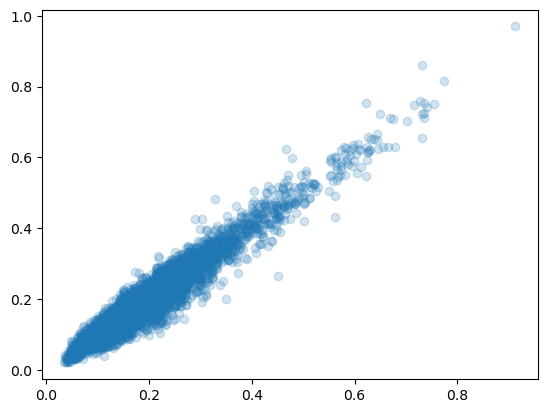

In [57]:
plt.scatter(y_pred_test, y_test, alpha=0.2)

In [58]:
len(X_train)

15674

In [59]:
len(X_test)

7837

In [17]:
import pandas as pd

def remove_outliers(df, column_name, sigma=3):
    
    # Calculate the mean and standard deviation of the specified column
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()

    # Define the lower and upper bounds for outliers
    lower_bound = mean_value - sigma * std_value
    upper_bound = mean_value + sigma * std_value

    # Filter the DataFrame to exclude rows with values outside the bounds
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    outliers_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    
    # Plot the original column values
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df[column_name], label='Original Data', linewidth=0.5)
    
    # Highlight outliers in red
    plt.scatter(df.index[outliers_mask], df[column_name][outliers_mask], color='red', label='Outliers', zorder=10)
    
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.legend()
    plt.title(f'Original Data with Outliers Highlighted in Red ({column_name})')
    plt.show()

    return df[df_no_outliers].copy()


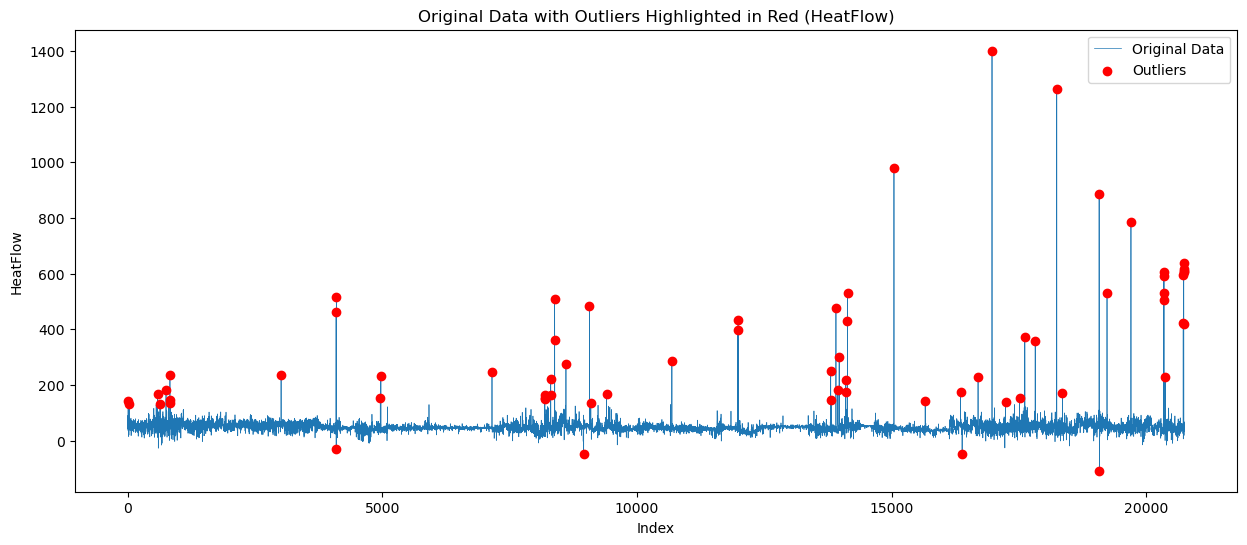

ValueError: Boolean array expected for the condition, not object

In [18]:
filtered_data_sigma = remove_outliers(data, 'HeatFlow')

In [19]:
filtered_data_sigma = filtered_data_sigma.reset_index(drop=True)

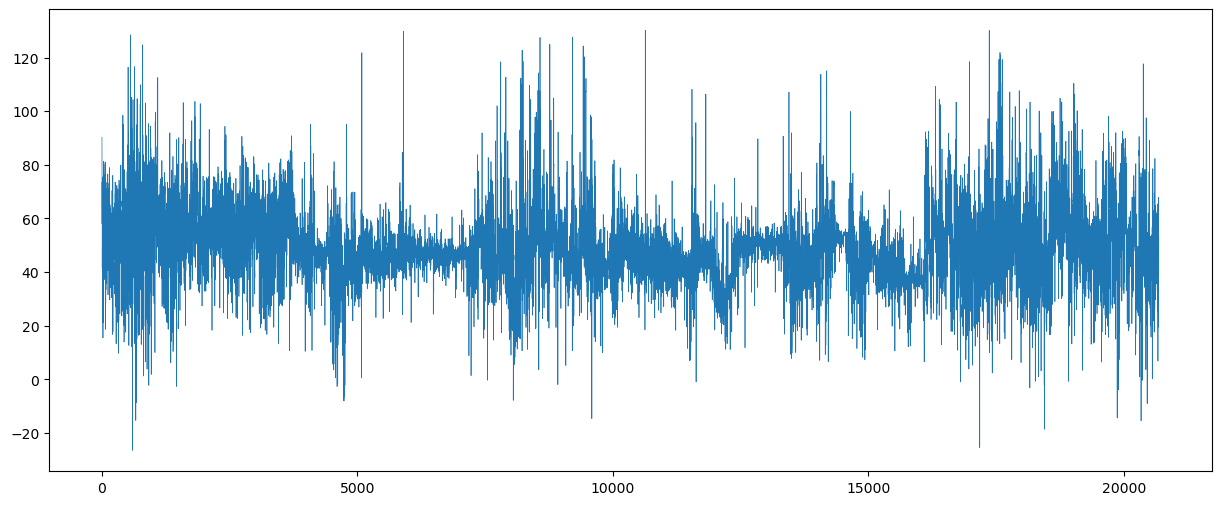

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(filtered_data_sigma.HeatFlow)), filtered_data_sigma.HeatFlow, linewidth=0.5)

In [21]:
from sklearn.preprocessing import MinMaxScaler


# Identify numeric columns (excluding string columns)
numeric_columns = filtered_data_sigma.select_dtypes(include=['number']).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on numeric columns and transform them
filtered_data_sigma[numeric_columns] = scaler.fit_transform(filtered_data_sigma[numeric_columns])

In [22]:
# Define features and target
features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp']
geological_layers = filtered_data_sigma.iloc[:, 52:101].values
geological_conds = filtered_data_sigma.iloc[:, 101:150].values
mult = np.multiply(geological_layers, geological_conds)
np.nan_to_num(mult, 0)
X = np.concatenate((filtered_data_sigma[features].values, mult), axis=1)
y = filtered_data_sigma['CorrBHT'].values

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Assuming X, y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

In [24]:
gbm = xgb.XGBRegressor(learning_rate=0.01,  
                           objective='reg:squarederror', 
                           n_estimators=2000, 
                           reg_alpha=1,
                           reg_lambda=10,
                           max_depth=10, 
                           gamma=0.1)
gbm.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
y_pred = gbm.predict(X_test)
# mean_absolute_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)
# std_xgb.append(np.nanstd(abs(y_test-y_pred)))

0.0011956159308285823